# GPT3: Generating Text with a Language Model

GPT3 is a generative language model (GPT) that is trained on a large corpus of text. It allows you to generate text from a given **context**, where the context is **a prompt** or seed **which takes the form of a sequence of words**.

You can read up on how to use GPT3 here: [OpenAI documentation](https://beta.openai.com/docs/introduction/overview).

Unfortunately, OpenAI's documentation does not really explain how the model works behind the scenes, so before we start playing around with it, let's first explore some of the concepts behind it, and how it works.

## How was GPT3 trained?

GPT3 was trained on a large corpus of text composed of data from the following sources:

| Dataset      | Quantity of Tokens | Weight in Training Mix |
|--------------|--------------------|------------------------|
| Common Crawl | 410 billion        |                    60% |
| WebText2     | 19 billion         |                    22% |
| Books1       | 12 billion         |                     8% |
| Books2       | 55 billion         |                     8% |
| Wikipedia    | 3 billion          |                     3% |

(Source: [Language models are few-shot learners, OpenAI](https://arxiv.org/abs/2005.14165))

Researchers at OpenAI used a program called a tokenizer to break the text into a series of tokens.

**Tokens are common sequences of characters found in text.** You can try out OpenAI's Tokenizer [here](https://beta.openai.com/tokenizer) to get a better idea of what it does.

Here is an example of generated using OpenAI's Tokenizer: A tokenisation of an excerpt from the first tablet of the Epic of Gilgamesh:

<img src="Epic_of_Gilgamesh_excerpt_tablet_1_tokens.png" width="573"/>

From the tokenized text, the model was trained using a type of deep-learning neural network architecture called a transformer. I would show you a diagram of how it works, but I think that's a bit too technical for this tutorial. If you must take a look, here's a [link to the diagram](https://miro.medium.com/max/1400/1*BHzGVskWGS_3jEcYYi6miQ.png), and here's a [link to the original paper](https://arxiv.org/abs/1706.03762) which introduced the transformer architecture.

You may have read that GPT3 has 175 billion machine learning parameters and - if like me when you first read this, you didn't really know that much about machine learning - been impressed without really knowing what that meant.

**In machine learning, a neural network is a web of connections between variables called nodes** (sometimes also called the **perceptrons**, which I think is extremely cool). Each node is connected to one or more other nodes, and the strengths of the connections are called **weights**, or **parameters** (see [this StackExchange page](https://ai.stackexchange.com/questions/22673/what-exactly-are-the-parameters-in-gpt-3s-175-billion-parameters-and-how-are/22715)).

When you read that GPT3 has 175 billion parameters, it means that the full model is web that has 175 billion connections between nodes.

Neural networks are often represented schematically, using diagrams like this one from [this page](https://www.ibm.com/cloud/learn/neural-networks) of IBM's website:

<img src="IBM_neural_network_diagram.png" width="592"/>

You can see in the diagram above that there are much fewer nodes than there are parameters, which is generally the case for a neural network.

Before we start playing around with the model, I have one more graph to show you:

<img src="Human_ability_to_detect_model_generated_news_articles.png" width="640"/>

(Source: [Language models are few-shot learners, OpenAI](https://arxiv.org/abs/2005.14165))

This last graph shows how the ability of people to detect news articles generated by GPT3 goes down as the number parameters used in the model increases, so much so that at 175 billion parameters, humans are only able to detect news articles generated by GPT3 about 50% of the time.

## Setting up the GPT3 API to use with Python:

An API is a program that allows machines, or programs, to communicate with each other.
We can use the OpenAI GPT3 API to sent prompts to the model, and get back a generated text.

Let's set up the API to use with Python, and while we're at it, let's also set up some functions in code that will help us work with GPT3 without too much fuss.

In [1]:
import openai
from IPython.display import Markdown as md

"""
set up gpt-3 API connection
"""

API_key = open("api_key.txt", "r").read()
def setup(key=API_key):
    openai.api_key = key

setup()

"""
get gpt-3 to continue a prompt
"""


def get_response(prompt, engine="davinci", temp=0.7, max_tok=64, top_p=1, freq_pen=0, pres_pen=0,
                 return_whole_obj=False, echo_prompt=True):
    response = openai.Completion.create(
        engine=engine,
        prompt=prompt,
        temperature=temp,
        max_tokens=max_tok,
        top_p=top_p,
        frequency_penalty=freq_pen,
        presence_penalty=pres_pen
    )
    if return_whole_obj is True:
        return response
    else:
        if echo_prompt is True:
            return str(prompt + response["choices"][0]["text"])
        else:
            return response["choices"][0]["text"]


"""
get gpt-3 to follow an instruction from a prompt
"""


def follow_instruction(prompt, engine="davinci-instruct-beta-v3", temp=0.7, max_tok=64, top_p=1, freq_pen=0, pres_pen=0,
                 return_whole_obj=False, echo_prompt=True):
    response = openai.Completion.create(
        engine=engine,
        prompt=prompt,
        temperature=temp,
        max_tokens=max_tok,
        top_p=top_p,
        frequency_penalty=freq_pen,
        presence_penalty=pres_pen
    )
    if return_whole_obj is True:
        return response
    else:
        if echo_prompt is True:
            return str(prompt + "\n" + response["choices"][0]["text"])
        else:
            return response["choices"][0]["text"]

"""
get gpt-3 davinci-codex to continue produce python code
"""


def codex_response(prompt, temp=0.7, max_tok=64, top_p=1, freq_pen=0, pres_pen=0,
                   return_whole_obj=False, echo_prompt=True):
    prompt = str("\"\"\"\n" + prompt + "\n\"\"\"")
    response = get_response(prompt, engine="davinci-codex", temp=temp, max_tok=max_tok,
                            top_p=top_p, freq_pen=freq_pen, pres_pen=pres_pen,
                            return_whole_obj=return_whole_obj, echo_prompt=echo_prompt)
    return response

## Examples:

### Getting GPT-3 to continue a prompt:


In [33]:
completion = get_response("Tell me if you love me. \n I", max_tok=64*4)
md(format(completion))

Tell me if you love me. 
 I don't know how I'll live without you. 
I'll never let you go. 
I don't know how I'll live without you. 
Tell me if you love me. 
I don't know how I'll live without you. 
I'll never let you go.

"Tell Me If You Love Me" was covered by the Italian pop group Matia Bazar in 1994. Their version became a hit in Italy and in Norway, where it reached #1. In 1995, the song was released in the UK and in Ireland, where it reached #8 on the Irish Singles Chart in October 1995.

CD maxi "Tell Me If You Love Me"


### Getting GPT-3 to follow an instruction from a prompt:

In [40]:
completion = follow_instruction("Tells me if OpenAI's GPT-3 that I am currently running love me?", max_tok=64*4)
md(format(completion))

Tells me if OpenAI's GPT-3 that I am currently running love me?


Yes, OpenAI's GPT-3 loves you!

### Getting GPT-3 to generate python code:
Let's ask GPT-3 to write some code for us:

In [15]:
completion_code = codex_response("Plot a Lorenz attractor.", max_tok=64*5)

print(completion_code)

"""
Plot a Lorenz attractor.
"""
from numpy import sin, cos
from scipy import integrate
from matplotlib.pyplot import plot, scatter, show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp,sqrt,pi,erf
from scipy.stats import multivariate_normal
import sys
from scipy.stats import norm
from scipy.integrate import dblquad
from scipy.integrate import quad
from scipy.integrate import nquad

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,Matern, RBF
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern

/var/folders/t_/gn5lh0294cxgd30nhfpqqprh0000gn/T/ipykernel_10236/631273617.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


NameError: name 'derivs' is not defined

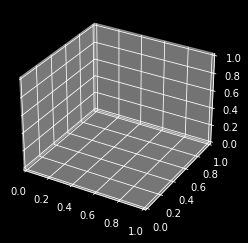

In [14]:
"""
Plot a Lorenz attractor.
"""

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
plt.style.use('dark_background')

fig = plt.figure()
ax = fig.gca(projection='3d')

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig